#Proyecto del módulo 1 - Hugo Canaval

##Importamos todas las librerias

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm
from scipy.stats import ttest_ind
import datetime
from math import factorial
import math as mt
import scipy.stats as stats
from scipy.stats import levene, ttest_ind

##Cargamos la base de datos

In [2]:
games = pd.read_csv('/content/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##Preparamos los datos

In [3]:
#Comprobamos nombres de las columnas, que no tengas espacios
print(games.columns)
#Reemplazamos los nombres de las columnas a minusculas
games.columns = games.columns.str.lower()
#Vericiamos información del df
print(games.info())
#Pasamos year_of_release a entero
games['year_of_release'] = games['year_of_release'].astype('Int64')
#Verificamos la varialbe critic_score para evidenciar si es entero
games_critic_notna = games[games['critic_score'].notna()]
print(games_critic_notna['critic_score'].head(40))
#Pasamos critic_score a entero
games['critic_score'] = games['critic_score'].astype('Int64')


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
0     76.0
2     82.0
3     80.0
6     89.0
7     58.0
8    

In [4]:
#Veriricamos valores ausentes
print(games.isna().sum())
#Verificamos valores ausentes de name. Eliminamos
games_1 = games[games['name'].isna()]
print(games_1)
games = games.dropna(subset=['name'])
#Verificamos valores ausentes de year_of_release. Eliminamos
games_2 = games[games['year_of_release'].isna()]
print(games_2)
games = games.dropna(subset=['year_of_release'])

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08          <NA>        NaN    NaN  
14244         0.00          <NA>        NaN    NaN  
                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2             <NA>   
377                     FIFA Soccer 2004      PS2             <NA>   
456           LEGO Batman: The Videogame      Wii             <NA>   
475           wwe Smackdown vs. Raw 2006      PS2      

In [5]:
#Verificamos duplicados
print(games.duplicated().sum())

0


####Como parte de preparación de los datos se hizo lo siguiente:

- Homogeneizamos los títulos poniéndolos en minúsculas. Verificamos si tenían espacios adicionales y vimos que no era el caso.

- Convertimos las variables year_of_release y critic_score de tipo float a int, dado que representan números enteros.

- Eliminamos las dos filas con valores ausentes en name porque el impacto de borrarlas era mínimo y, además, esas mismas filas presentaban otros campos vacíos.

- Eliminamos las filas con valores ausentes en year_of_release, ya que el año de lanzamiento es esencial para nuestros análisis. No sería lógico reemplazarlo con la media o la mediana, pues se trata de una fecha.

- Verificamos que no hubieran duplicados explicitos

#Revisando valores ausentes de critic_score, user_socre y rating

- Para critic_score, se detectaron 8578 valores ausentes de un total de 16715. **Rellenar más de la mitad de los puntajes con una sola cifra (sea la media o la mediana) distorsionaría demasiado la información**. Por ahora, decidimos dejar esos valores vacíos para no alterar la distribución real de los datos.

- Para user_score y rating, usamos la misma lógica y no eliminamos esas filas con valores ausentes. Conservarlas evita perder información valiosa.

- Decidimos dejar en blanco (NaN) los datos que no pudimos recuperar de forma confiable. Si quitamos demasiadas filas, corremos el riesgo de dañar nuestro análisis. Así, mantenemos la información existente y evitamos sesgos.

- Creemos que muchos valores están ausentes porque no se registraron adecuadamente o porque el juego no fue evaluado (como en casos de TBD). En esos casos, no queremos inventar datos que podrían llevarnos a conclusiones erróneas.

##Ventas totales

Unificamos ventas de Japon, Europa y EEUU

In [6]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


##Analisis de datos



Graficamos juegos lanzados por año para evidenciar una tendendia entre los lanzamientos por año

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
dtype: int64


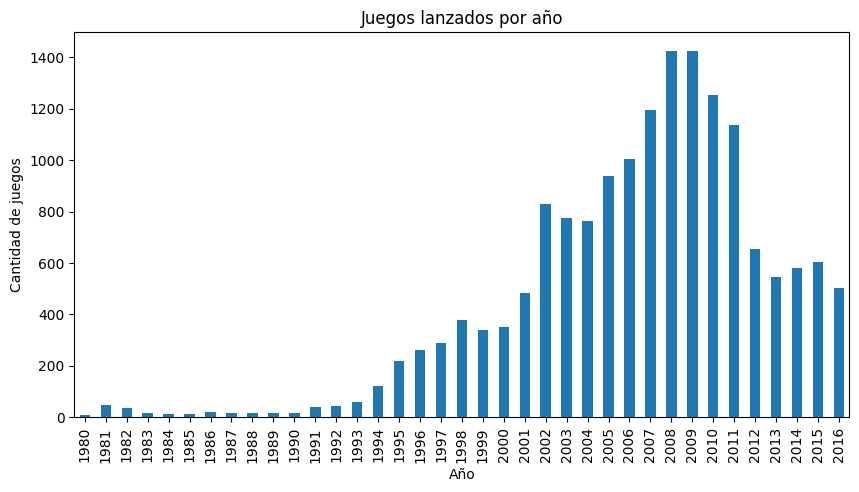

In [7]:
#Miramos juegos lanzados por año
games_per_year = games.groupby('year_of_release').size()
print(games_per_year)
# Graficamos en un diagrama de barras:
plt.figure(figsize=(10,5))
games_per_year.plot(kind='bar')
plt.title("Juegos lanzados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")
plt.show()

A partir de 1994 vemos un aumento en el número de juegos lanzados, impulsado por la llegada de PlayStation y Nintendo 64. Sin embargo, el verdadero auge se da después del año 2000, con la aparición de consolas más modernas (Xbox, PlayStation 2) y picos máximos de lanzamientos en 2008 y 2009

In [8]:
# Observamos el primer y último año de ventas para cada plataforma, a fin de detectar cuándo nacen y cuándo dejan de vender las consolas.
platform_years = games.groupby('platform')['year_of_release'].agg(['min','max'])
print("Años de primera y última venta por plataforma:\n")
print(platform_years.sort_values('min'))

Años de primera y última venta por plataforma:

           min   max
platform            
2600      1980  1989
NES       1983  1994
DS        1985  2013
PC        1985  2016
GB        1988  2001
SNES      1990  1999
GEN       1990  1994
GG        1992  1992
SCD       1993  1994
NG        1993  1996
SAT       1994  1999
PS        1994  2003
3DO       1994  1995
TG16      1995  1995
PCFX      1996  1996
N64       1996  2002
DC        1998  2008
WS        1999  2001
GBA       2000  2007
XB        2000  2008
PS2       2000  2011
GC        2001  2007
PSP       2004  2015
X360      2005  2016
PS3       2006  2016
Wii       2006  2016
3DS       2011  2016
PSV       2011  2016
WiiU      2012  2016
PS4       2013  2016
XOne      2013  2016


Encontramos una inconsistencia con la plataforma DS, donde aparece un juego registrado con ventas en 1985.

Tras investigar, confirmamos que la Nintendo DS fue lanzada en 2004 y no existe otra consola llamada DS.

Al filtrar los juegos de DS con año de lanzamiento anterior al 2000, identificamos que el error proviene de un único juego registrado con el año 1985. Sin embargo, al verificar su información en internet, descubrimos que realmente fue lanzado en 2007.

Por lo tanto, corregiremos este dato en la base de datos para reflejar la información correcta

In [9]:
# Filtramos los juegos de la plataforma "DS" cuyo año de lanzamiento sea menor a 2000
ds_before_2000 = games[(games['platform'] == 'DS') & (games['year_of_release'] < 2000)]
ds_before_2000
# Actualizamos el valor de 'year_of_release' en la fila 15957 a 2007
games.at[15957, 'year_of_release'] = 2007

# Verificamos que el cambio se haya realizado correctamente
games.loc[15957]


,15957
name,Strongest Tokyo University Shogi DS
platform,DS
year_of_release,2007
genre,Action
na_sales,0.0
eu_sales,0.0
jp_sales,0.02
other_sales,0.0
critic_score,<NA>
user_score,NaN


Agrupamos y graficamos ventas totales para entender el comportamiento entre consolas

platform_sales
 platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64 

sales_by_year_platform platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
2000                NaN   39.17     NaN     NaN     NaN
2001                NaN  166.43     NaN     NaN     NaN
2002                NaN  205.38     NaN     NaN     NaN
2003                NaN  184.31     NaN     NaN     NaN
2004              17.27  211.81     NaN     NaN     NaN
2005             130.14  160

<Figure size 1200x600 with 0 Axes>

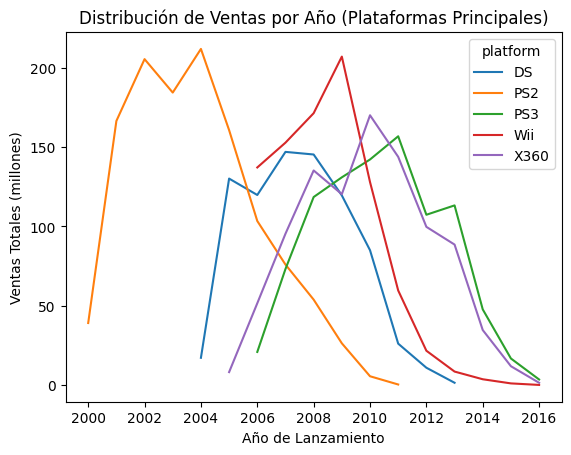

Años de primera y última venta por plataforma:

           min   max
platform            
2600      1980  1989
NES       1983  1994
PC        1985  2016
GB        1988  2001
SNES      1990  1999
GEN       1990  1994
GG        1992  1992
SCD       1993  1994
NG        1993  1996
SAT       1994  1999
PS        1994  2003
3DO       1994  1995
TG16      1995  1995
PCFX      1996  1996
N64       1996  2002
DC        1998  2008
WS        1999  2001
GBA       2000  2007
XB        2000  2008
PS2       2000  2011
GC        2001  2007
DS        2004  2013
PSP       2004  2015
X360      2005  2016
PS3       2006  2016
Wii       2006  2016
PSV       2011  2016
3DS       2011  2016
WiiU      2012  2016
PS4       2013  2016
XOne      2013  2016


In [10]:
# Primero, agrupamos las ventas por plataforma para identificar cuáles tienen las mayores ventas totales.
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('platform_sales\n',platform_sales,'\n')

# Escogemos las cinco plataformas que más vendieron.
top_platforms = platform_sales.head(5).index

# Filtramos el dataset para quedarnos solo con esas plataformas principales.
games_top = games[games['platform'].isin(top_platforms)]

# Usamos groupby y unstack en lugar de pivot para ver cómo evolucionan las ventas por año en cada plataforma.
sales_by_year_platform = (
    games_top
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack('platform')  # Convertimos la plataforma en columnas
)
print('sales_by_year_platform',sales_by_year_platform,'\n')
# Graficamos la distribución de ventas por año de estas plataformas.
plt.figure(figsize=(12,6))
sales_by_year_platform.plot()
plt.title("Distribución de Ventas por Año (Plataformas Principales)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales (millones)")
plt.show()

# Observamos el primer y último año de ventas para cada plataforma, a fin de detectar cuándo nacen y cuándo dejan de vender las consolas.
platform_years = games.groupby('platform')['year_of_release'].agg(['min','max'])
print("Años de primera y última venta por plataforma:\n")
print(platform_years.sort_values('min'))

Las plataformas con mayores ventas suelen ser las más modernas, lanzadas después del 2000, como la PS2 y la Xbox. Sin embargo, debemos tener presente que PlayStation se actualiza constantemente: en 2003, la PS1 "desaparece", pero es reemplazada por la PS2; lo mismo ocurre con la PS2 en 2011, dando paso a la PS3 y luego a la PS4 (incluyendo su variante portátil, la PSP). En el top 6 de ventas, encontramos las tres consolas principales de Sony.

La gran mayoría de las consolas antiguas desaparecieron con la llegada de las más modernas en los 2000. Un ejemplo es la Game Boy (GB), que se encuentra en el top 10 de ventas, con juegos lanzados durante 13 años hasta 2001, cuando fue reemplazada por la Game Boy Advance (GBA).

En general, las consolas se actualizan con nuevas versiones, lo que les permite mantenerse vigentes y perpetuar el liderazgo de Sony, Microsoft y Nintendo.

Por otro lado, algunas consolas más antiguas desaparecieron por completo, como la Atari o Sega, que fueron las únicas que no tuvieron sucesora y quedaron obsoletas tras 9 años en el mercado.

Un caso especial es el PC, que ha sido la única "consola" presente desde 1994 y sigue vigente, aunque no se encuentra en el top 5 de ventas. Esto podría deberse a que no es un dispositivo diseñado exclusivamente para videojuegos, por lo que no cuenta con ventajas competitivas como juegos exclusivos o estrategias de marketing enfocadas únicamente en gaming.

Conclusión
El éxito en ventas y la vida útil de una consola dependen de su capacidad de actualización a versiones más modernas. Las consolas de Atari (2600) y Sega (GEN, GG, SCD, NG, SAT) fueron de las primeras en el mercado y marcaron el inicio de la industria de los videojuegos, pero al no evolucionar con nuevas versiones, fueron reemplazadas por consolas más avanzadas. Esto se evidencia en el código a continuación, donde NES y SNES dominaban el mercado antes de 1995, pero con el tiempo fueron desplazadas por nuevos modelos.

In [11]:
# Filtramos solo los datos donde year_of_release sea 1995 o menor
games_old = games[games['year_of_release'] <= 1995]

# Agrupamos las ventas por plataforma para identificar cuáles tienen las mayores ventas totales en este período.
platform_sales_old = games_old.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('platform_sales (hasta el año 1995)\n', platform_sales_old, '\n')


platform_sales (hasta el año 1995)
 platform
NES     251.05
SNES    182.65
GB      118.13
2600     86.48
PS       41.99
GEN      28.35
PC       20.19
SAT      15.22
SCD       1.86
NG        1.34
TG16      0.16
3DO       0.10
GG        0.04
Name: total_sales, dtype: float64 



###Determinamos periodos relevantes

Para determinar el período de datos adecuado para construir un modelo para 2017, analizamos lo siguiente:

- Vimos que la cantidad de juegos lanzados comenzó a aumentar significativamente a partir del año 2000, con picos en 2008 y 2009.

- La mayoría de las consolas tienen una duración aproximada de 10 años antes de ser reemplazadas por una versión más moderna. Consolas como PS2 dejaron de recibir juegos con el tiempo, mientras que PS4 y Xbox One seguían activas en 2016. Existe la posibilidad que para el 2017, consolas con Wii, Xbox o PS3 no reciban mas juegos por su decrecimiento en ventas y las actualizaciones a su nueva versión

- Observamos que las plataformas más exitosas en los últimos años siguen una tendencia estable, pero algunas más antiguas dejaron de vender juegos.

Dado que buscamos predecir las ventas para 2017, es recomendable usar los datos más recientes y relevantes. Si tomamos un período demasiado largo, incluiremos consolas obsoletas que no aportan información útil para el futuro.

Para construir el modelo, usaremos los datos desde 2012 hasta 2016.



In [12]:
# Creamos un nuevo DataFrame con los datos desde 2012 en adelante
games_recent = games[games['year_of_release'] >= 2012]

# Verificamos que solo tengamos datos del período seleccionado
print(games_recent['year_of_release'].unique())

# Mostramos la cantidad de registros en el nuevo DataFrame
print(f"Cantidad de filas en el nuevo DataFrame: {games_recent.shape[0]}")


<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64
Cantidad de filas en el nuevo DataFrame: 2886


Tomando en consideración el nuevo DataFrame con los datos de ventas desde 2012, según nuestro racional, realizamos el mismo análisis para consolas.

platform_sales (desde 2012)
 platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64 

sales_by_year_platform (desde 2012)
 platform           3DS     PS3     PS4   X360   XOne
year_of_release                                     
2012             51.36  107.36     NaN  99.74    NaN
2013             56.57  113.25   25.99  88.58  18.96
2014             43.76   47.76  100.00  34.74  54.07
2015             27.78   16.82  118.90  11.96  60.14
2016             15.14    3.60   69.25   1.52  26.15 



<Figure size 1200x600 with 0 Axes>

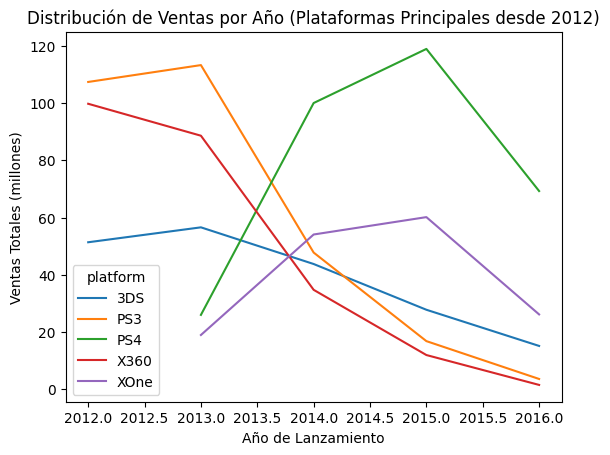

Años de primera y última venta por plataforma (desde 2012):

           min   max
platform            
3DS       2012  2016
DS        2012  2013
PC        2012  2016
PS3       2012  2016
PSP       2012  2015
PSV       2012  2016
Wii       2012  2016
WiiU      2012  2016
X360      2012  2016
PS4       2013  2016
XOne      2013  2016


In [13]:
#Agrupamos las ventas por plataforma usando el nuevo DataFrame con datos desde 2012.
platform_sales_recent = games_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('platform_sales (desde 2012)\n', platform_sales_recent, '\n')

# Escogemos las cinco plataformas con mayores ventas en este período.
top_platforms_recent = platform_sales_recent.head(5).index

# Filtramos el dataset para quedarnos solo con esas plataformas principales.
games_top_recent = games_recent[games_recent['platform'].isin(top_platforms_recent)]

# Usamos groupby y unstack en lugar de pivot para ver cómo evolucionan las ventas por año en cada plataforma.
sales_by_year_platform_recent = (
    games_top_recent
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack('platform')  # Convertimos la plataforma en columnas
)

print('sales_by_year_platform (desde 2012)\n', sales_by_year_platform_recent, '\n')

# Graficamos la distribución de ventas por año de estas plataformas.
plt.figure(figsize=(12,6))
sales_by_year_platform_recent.plot()
plt.title("Distribución de Ventas por Año (Plataformas Principales desde 2012)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales (millones)")
plt.show()

# Observamos el primer y último año de ventas para cada plataforma en este período.
platform_years_recent = games_recent.groupby('platform')['year_of_release'].agg(['min','max'])
print("Años de primera y última venta por plataforma (desde 2012):\n")
print(platform_years_recent.sort_values('min'))

Obviando el año 2016, donde las ventas caen de manera generalizada, observamos una fuerte caída desde 2013 en consolas más antiguas como la PS3, Xbox 360 y 3DS. Esto coincide con el lanzamiento de consolas más modernas, como la PS4 y Xbox One, que alcanzaron sus máximos históricos en 2015.

Por otro lado, Nintendo no ha logrado posicionarse en el top con sus consolas de escritorio, como la Wii o Wii U. Sin embargo, la Nintendo 3DS sí logró entrar en el ranking, aunque con una tendencia decreciente desde 2013, alcanzando sus mínimos históricos dentro del período analizado.


###Boxplot

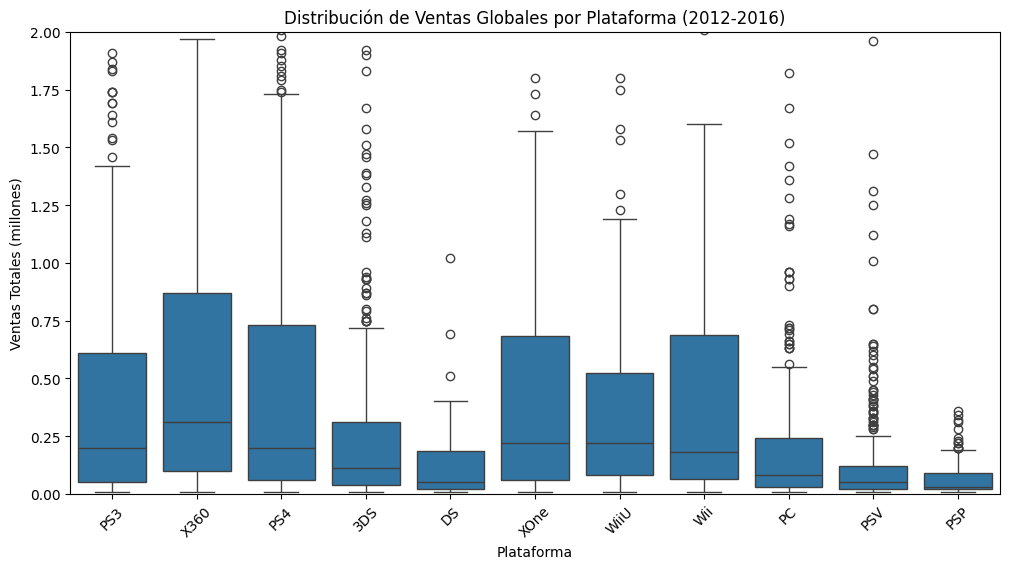

In [14]:
# Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
plt.figure(figsize=(12,6))
sns.boxplot(data=games_recent, x='platform', y='total_sales')

# Ajustamos el rango del eje Y para mejorar la visualización (si hay valores extremos que distorsionen el gráfico).
plt.ylim(0, 2)  # Ajustable según los datos para visualizar mejor

# Configuramos los títulos y etiquetas
plt.title("Distribución de Ventas Globales por Plataforma (2012-2016)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")

plt.xticks(rotation=45)  # Rotamos los nombres de las plataformas si es necesario

plt.show()

Hallazgos del Boxplot

Las diferencias en ventas entre plataformas son notables. Algunas muestran una mayor dispersión de datos y valores extremos, lo que indica juegos con ventas excepcionalmente altas.

La mayoría de las plataformas tienen una mediana baja, lo que sugiere que la mayoría de los juegos venden pocos millones de unidades, mientras que unos pocos títulos dominan el mercado.

Todas las plataformas (Especialmente la PS3, PS4, 3DS y XOne) muestran valores atípicos en la parte superior del diagrama, indicando juegos con ventas excepcionales.

Nintendo 3DS y otras consolas más antiguas pueden tener una mediana más baja, reflejando que sus juegos, en promedio, venden menos que en plataformas más recientes.

El análisis confirma que las ventas de videojuegos están concentradas en unos pocos títulos exitosos, mientras que la mayoría vende en rangos mucho más bajos.

###Analisis impacto reseñas de usuarios

<ipython-input-15-80b33f2ba652>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')


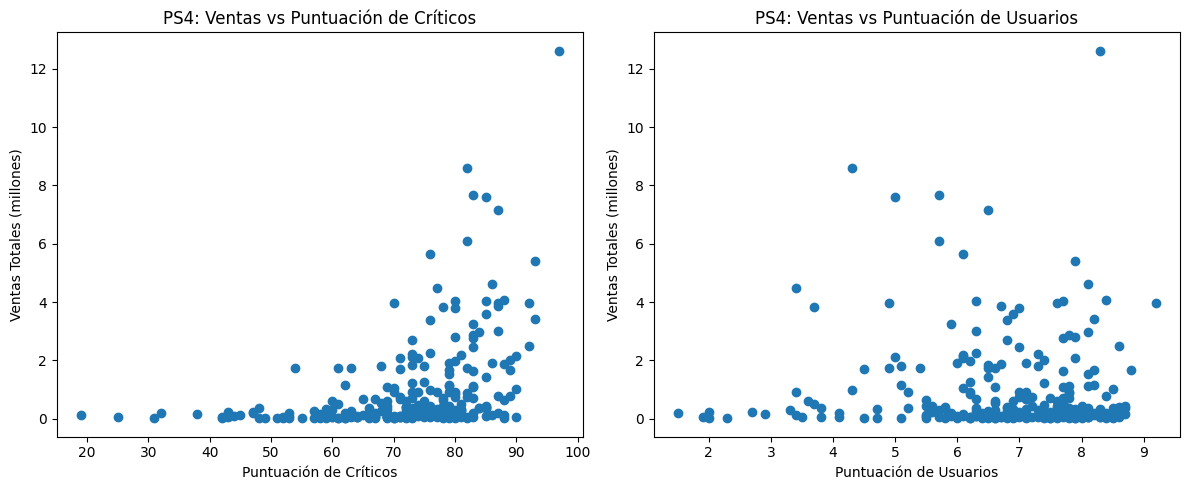

In [15]:
# Elegimos la plataforma mas popular, PS4
ps4_data = games_recent[games_recent['platform'] == 'PS4']

# Eliminamos valores no numericos en la variable user_score como tbd
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')

# Eliminamos filas con valores NaN en 'critic_score' y 'user_score' para hacer el análisis de correlación
ps4_data = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])


# Creamos gráficos de dispersión para ver la relación entre las reseñas y las ventas
plt.figure(figsize=(12,5))


# Gráfico de dispersión: Critic Score vs. Total Sales
plt.subplot(1,2,1)
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('PS4: Ventas vs Puntuación de Críticos')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')

# Gráfico de dispersión: User Score vs. Total Sales
plt.subplot(1,2,2)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('PS4: Ventas vs Puntuación de Usuarios')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()


Calculamos correlación

In [16]:
# Calculamos la correlación entre la puntuación de críticos y las ventas
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

# Calculamos la correlación entre la puntuación de usuarios y las ventas
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])

# Imprimimos los resultados
print(f"Correlación entre puntuación de críticos y ventas en PS4: {critic_corr:.2f}")
print(f"Correlación entre puntuación de usuarios y ventas en PS4: {user_corr:.2f}")

Correlación entre puntuación de críticos y ventas en PS4: 0.41
Correlación entre puntuación de usuarios y ventas en PS4: -0.03


A simple vista, en el gráfico de dispersión, vemos una correlación  positiva entre la puntuación de los críticos y las ventas. Los juegos más exitosos suelen tener mejores puntajes, y el juego con más ventas también tiene la calificación más alta.

En cambio, en la gráfica de puntuación de usuarios, no hay una relación clara. Vemos juegos con muchas ventas y puntajes bajos, lo que indica que la opinión de los jugadores no impacta tanto en las ventas.

Si miramos los valores de correlación:

Críticos: 0.41 → Relación positiva, pero moderada.
Usuarios: -0.03 → Relación prácticamente inexistente.

En conclusión. Las puntuaciones de los críticos sí influyen en las ventas, aunque no de forma determinante. La puntuación de los usuarios, en cambio, no tiene impacto significativo en el éxito comercial de un juego.


###Comparación juegos entre plataformas

Para comparar las ventas de los mismos juegos en distintas plataformas, seguiremos estos pasos:

- Identificar los juegos de PS4 que tienen datos de ventas y reseñas.

- Buscar esos mismos juegos en otras plataformas dentro del dataset.

- Comparar las ventas totales entre las distintas plataformas.

- Visualizar los datos en una tabla y, si es útil, hacer un gráfico.

In [17]:
# Filtramos los juegos de PS4 con datos completos de ventas y puntuaciones
ps4_games = ps4_data[['name', 'platform', 'total_sales', 'critic_score', 'user_score']]

# Buscamos los mismos juegos en otras plataformas
same_games_other_platforms = games_recent[
    (games_recent['name'].isin(ps4_games['name'])) &
    (games_recent['platform'] != 'PS4')
]

# Unimos la información de ventas de PS4 con las de otras plataformas
comparison_df = pd.concat([ps4_games, same_games_other_platforms], ignore_index=True)

# Ordenamos primero por total_sales (de mayor a menor), luego por nombre y luego por plataforma
comparison_df = comparison_df.sort_values(by=['total_sales', 'name', 'platform'], ascending=[False, True, True])


# Mostramos los datos comparativos
comparison_df.head(20)

,name,platform,total_sales,critic_score,user_score,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,rating
249,Grand Theft Auto V,PS3,21.05,97,8.2,2013,Action,7.02,9.09,0.98,3.96,M
250,Grand Theft Auto V,X360,16.27,97,8.1,2013,Action,9.66,5.14,0.06,1.41,M
0,Grand Theft Auto V,PS4,12.62,97,8.3,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
251,Call of Duty: Ghosts,X360,10.24,73,2.6,2013,Shooter,6.73,2.56,0.04,0.91,M
252,Call of Duty: Ghosts,PS3,9.36,71,2.6,2013,Shooter,4.10,3.63,0.38,1.25,M
1,FIFA 16,PS4,8.58,82,4.3,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2,Call of Duty: Advanced Warfare,PS4,7.66,83,5.7,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
3,FIFA 17,PS4,7.60,85,5.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
4,Fallout 4,PS4,7.17,87,6.5,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
253,FIFA 14,PS3,6.46,86,4.3,2013,Sports,0.78,4.24,0.07,1.37,E


Realizamos grafico de barras con el top 10 de juegos por plataforma. Solo vamos a graficar el top5 de consolas ['PS3', 'PS4', 'X360', 'XOne', '3DS']


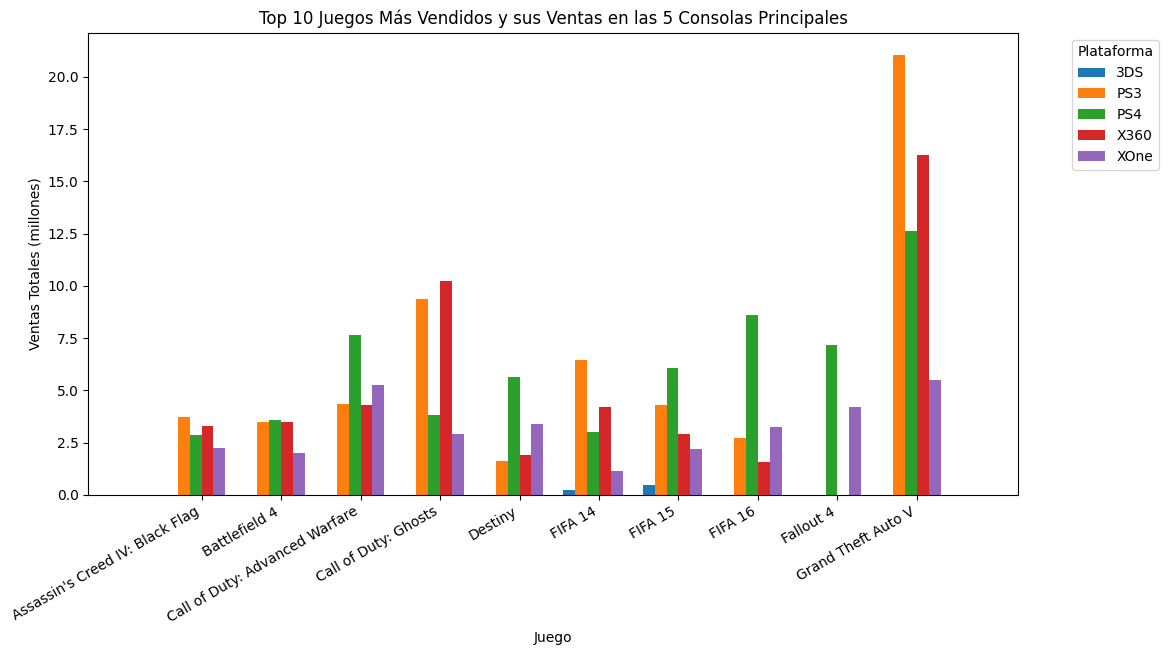

In [18]:
# Definimos las 5 plataformas principales
top_5_platforms = ['PS3', 'PS4', 'X360', 'XOne', '3DS']

# Seleccionamos el top 10 de juegos más vendidos en general (sin importar la plataforma)
top_10_games = comparison_df.groupby('name')['total_sales'].sum().nlargest(10).index

# Filtramos el dataset solo con esos juegos y las plataformas seleccionadas
top_10_df = comparison_df[(comparison_df['name'].isin(top_10_games)) & (comparison_df['platform'].isin(top_5_platforms))]

# Pivotamos para tener plataformas como columnas y los juegos en las filas
pivot_df = top_10_df.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Configuración del gráfico
plt.figure(figsize=(12,6))
bar_width = 0.15  # Reduce el ancho de las barras para mayor separación
x = np.arange(len(pivot_df))  # Posiciones de las barras en el eje X

# Iteramos sobre cada plataforma y graficamos sus barras en paralelo
for i, platform in enumerate(pivot_df.columns):
    plt.bar(x + i * bar_width, pivot_df[platform], width=bar_width, label=platform)

# Ajustamos etiquetas del eje X para mejorar la visualización
plt.xticks(x + bar_width * (len(pivot_df.columns) / 2), pivot_df.index, rotation=30, ha='right')

# Ajustamos los márgenes para que se vean bien las etiquetas
plt.margins(x=0.1)

# Títulos y leyenda
plt.title("Top 10 Juegos Más Vendidos y sus Ventas en las 5 Consolas Principales")
plt.xlabel("Juego")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico

plt.show()


Como vemos en la gráfica, el top 10 de juegos es multiplataforma. Sin embargo, hay diferencias en el desempeño según la consola. Por ejemplo, Call of Duty: Advanced Warfare tuvo mejores ventas en PS4, mientras que Call of Duty: Ghosts se vendió más en X360 y PS3, (consolas ya viejas, debe ser que el juego tambien es viejo y se desarrolló mejor en estas consolas)

En general, los juegos más vendidos están disponibles en varias plataformas, lo que impulsa su éxito. La distribución transversal en distintas consolas es clave para alcanzar mayores ventas.

###Analisis juegos por genero

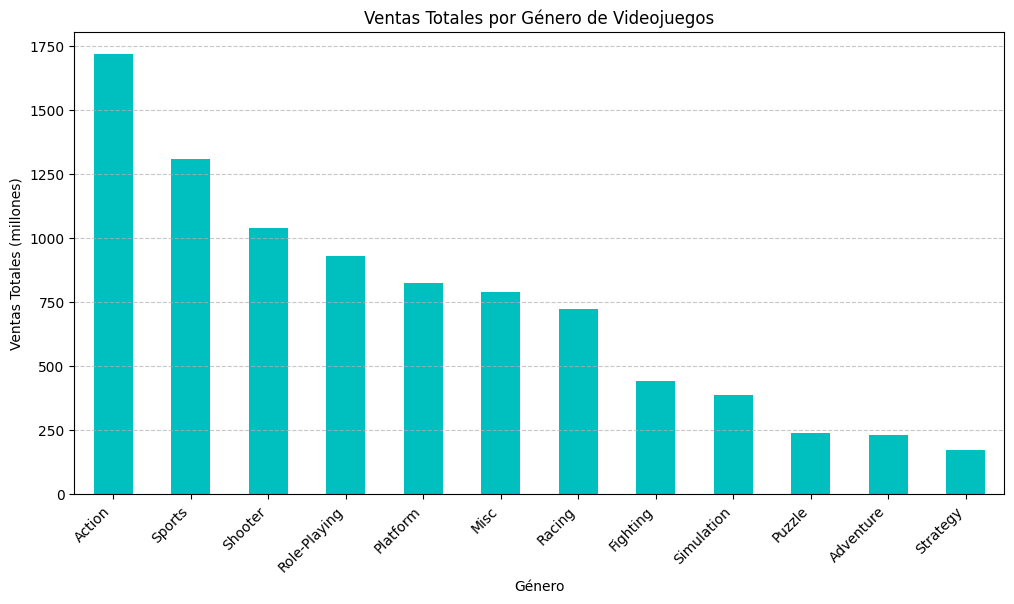

In [19]:
# Agrupamos las ventas por género
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Mostramos la distribución en un gráfico de barras
plt.figure(figsize=(12,6))
genre_sales.plot(kind='bar', color='c')
plt.title("Ventas Totales por Género de Videojuegos")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


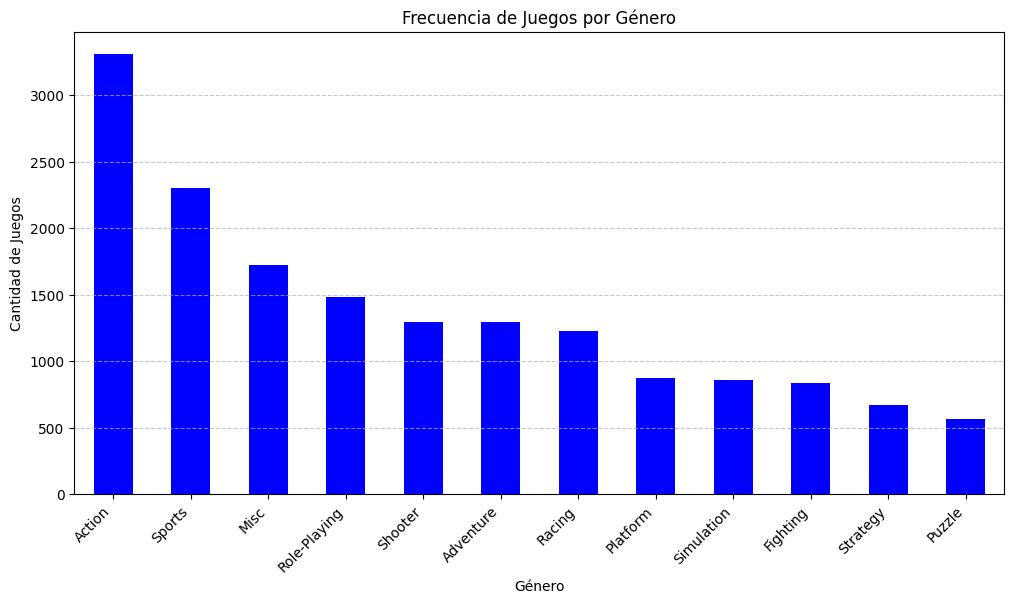

In [20]:
# Contamos la cantidad de juegos por género
genre_counts = games['genre'].value_counts()

# Creamos el gráfico de barras
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='b')
plt.title("Frecuencia de Juegos por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Juegos")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Fusionamos los 2 graficos para mejor visualización


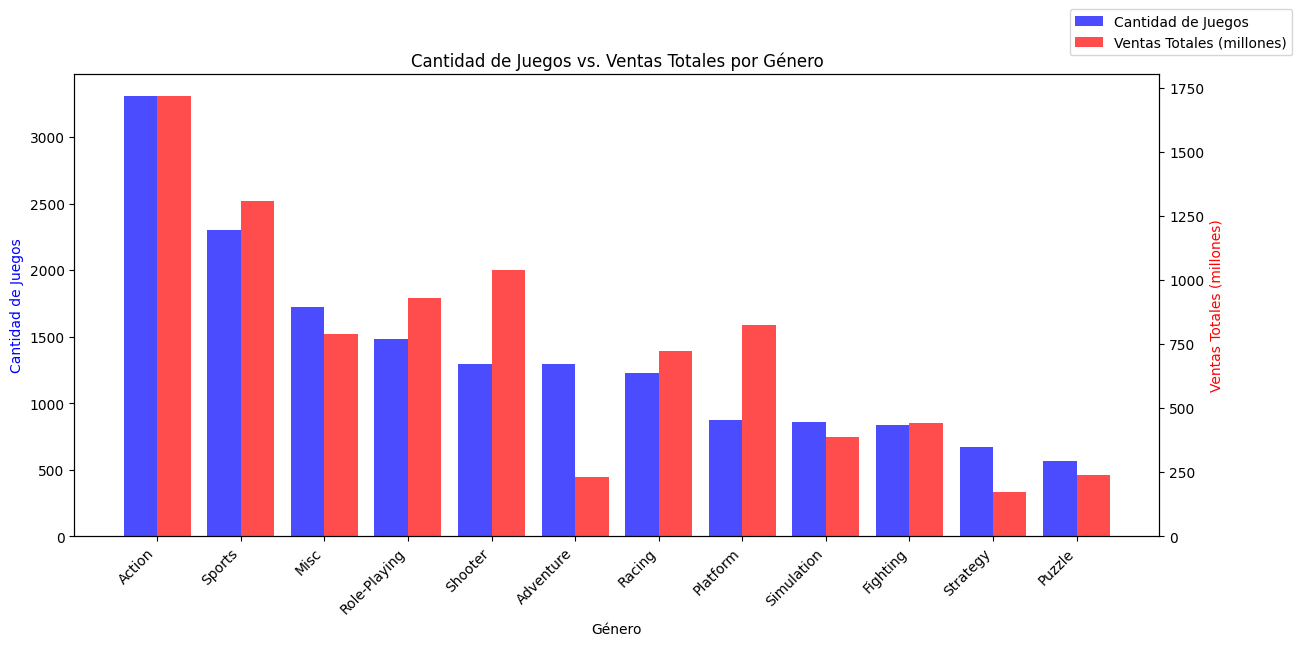

In [21]:
# Calculamos la cantidad de juegos por género
genre_counts = games['genre'].value_counts()

# Calculamos las ventas totales por género
genre_sales = games.groupby('genre')['total_sales'].sum()

# Ordenamos ambos valores según el mismo orden de géneros
genres = genre_counts.index  # Lista de géneros ordenados por cantidad de juegos
genre_sales = genre_sales.reindex(genres)  # Aseguramos el mismo orden

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

bar_width = 0.4
x = np.arange(len(genres))  # Posiciones en el eje X

# Graficamos la cantidad de juegos
ax1.bar(x - bar_width/2, genre_counts, width=bar_width, label="Cantidad de Juegos", color='b', alpha=0.7)

# Graficamos las ventas totales
ax2 = ax1.twinx()  # Creamos un segundo eje Y
ax2.bar(x + bar_width/2, genre_sales, width=bar_width, label="Ventas Totales (millones)", color='r', alpha=0.7)

# Configuración de ejes y etiquetas
ax1.set_xlabel("Género")
ax1.set_ylabel("Cantidad de Juegos", color='b')
ax2.set_ylabel("Ventas Totales (millones)", color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(genres, rotation=45, ha='right')

# Leyenda combinada
fig.legend(loc='upper right', bbox_to_anchor=(1,1))

plt.title("Cantidad de Juegos vs. Ventas Totales por Género")
plt.show()


El género más vendido es Acción, pero también es el que tiene mayor cantidad de juegos. Su éxito en ventas parece estar relacionado con su alta frecuencia en el mercado.

Si analizamos géneros como Sports, Role-Playing, Shoter, Racing o Plataform, vemos que las ventas totales superan la cantidad de juegos. Esto sugiere dos cosas:



1.   Que en estos generos hubo bestsellers que impulsaron las ventas, logrando un mejor desempeño a pesar de tener menos títulos en comparación con Action
2.   Que en general, las ventas de los generos nombrados (1 a 1) es mejor que Action

Para revisas esos dos puntos, realizamos un boxplot por genero


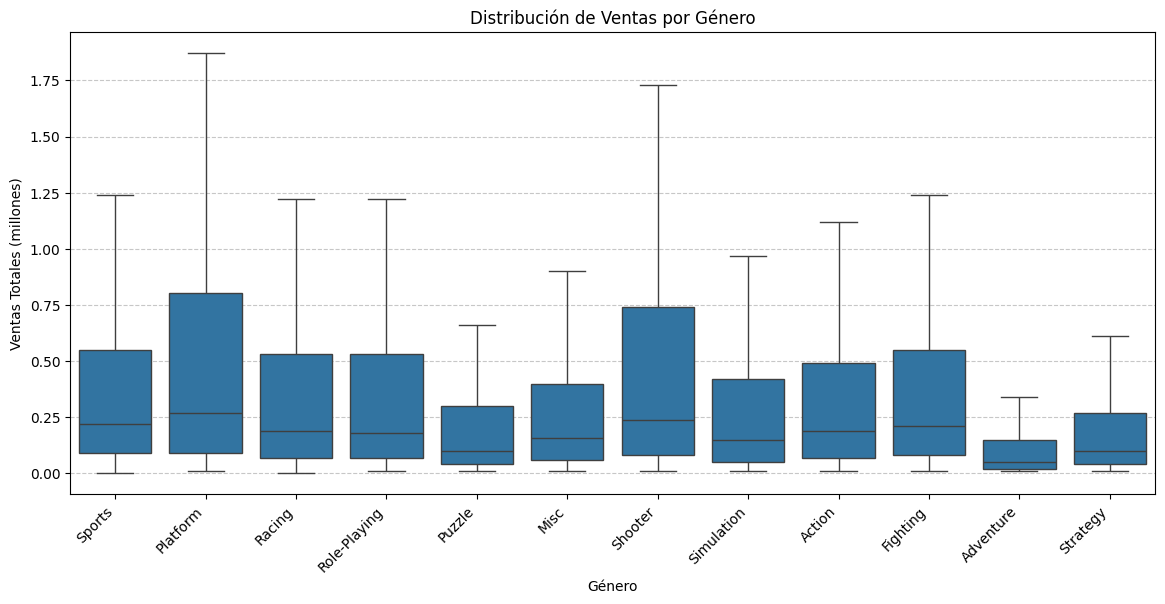

In [22]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14,6))

# Creamos el boxplot de ventas por género
sns.boxplot(x='genre', y='total_sales', data=games, showfliers=False)  # Ocultamos los outliers para mejor visualización

# Ajustamos el formato del gráfico
plt.xticks(rotation=45, ha='right')
plt.title("Distribución de Ventas por Género")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

En el boxplot, se observa que los géneros donde las ventas superan la cantidad de juegos tienen una mediana y un rango intercuartílico mayores en comparación con Action, que es el género más vendido y con más títulos. Esto es especialmente notable en Platform, donde la brecha entre el número de juegos y los ingresos es más pronunciada.

Esto indica que, en promedio, los juegos en estos géneros tienden a tener mejores ventas.

Además, presentan valores máximos más altos, lo que sugiere que algunos títulos extremadamente exitosos impulsan el crecimiento en ventas del género.

##Perfiles de usuario por región

##Las cinco plataformas principales en cada región

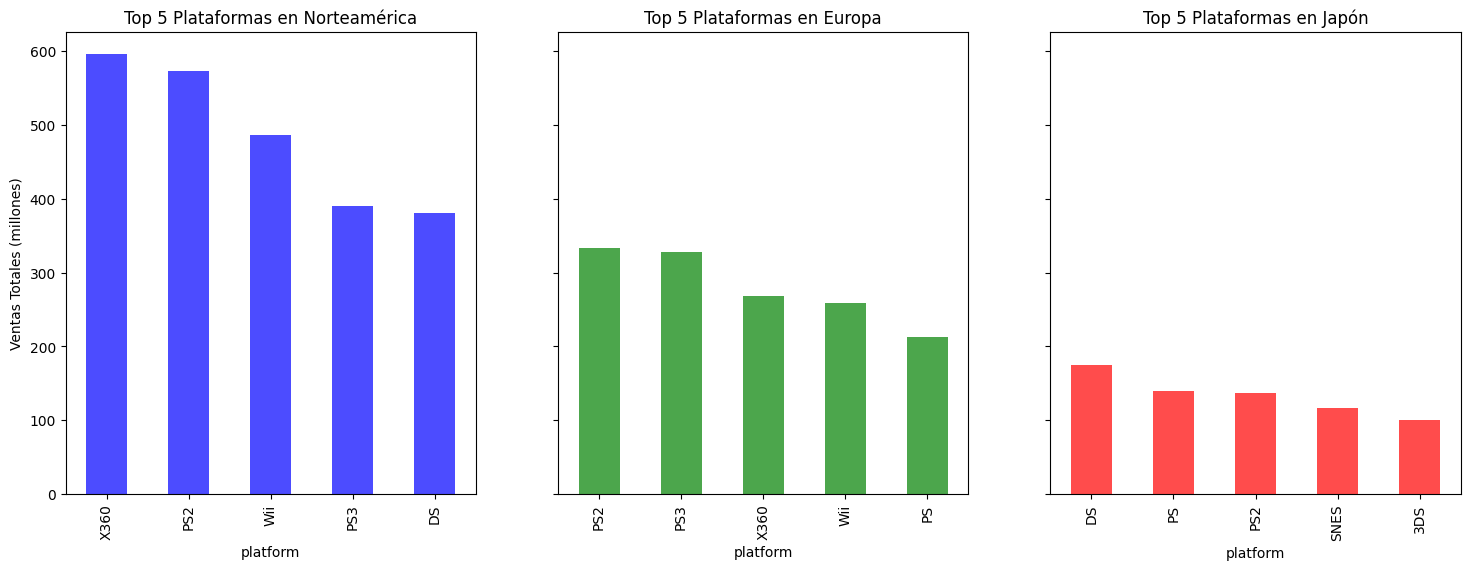

In [23]:

# Calculamos las ventas por plataforma en cada región
platform_sales_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Graficamos las plataformas más populares en cada región
fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

platform_sales_na.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
axes[0].set_title("Top 5 Plataformas en Norteamérica")
axes[0].set_ylabel("Ventas Totales (millones)")

platform_sales_eu.plot(kind='bar', ax=axes[1], color='g', alpha=0.7)
axes[1].set_title("Top 5 Plataformas en Europa")

platform_sales_jp.plot(kind='bar', ax=axes[2], color='r', alpha=0.7)
axes[2].set_title("Top 5 Plataformas en Japón")

plt.show()


En Norteamérica y Europa, es probable que consolas como PS4, XOne y X360 dominen debido a la alta popularidad de Sony y Microsoft, siendo esta ultima Norteaméricana

En Japón, las consolas de Nintendo y Sony suelen tener más éxito, mientras que Xbox tiende a tener menor relevancia. Cabe resaltar que ambas empresas son japonesas

La cuota de mercado varía dependiendo de la preferencia cultural de cada región.

###Los cinco géneros más vendidos en cada región

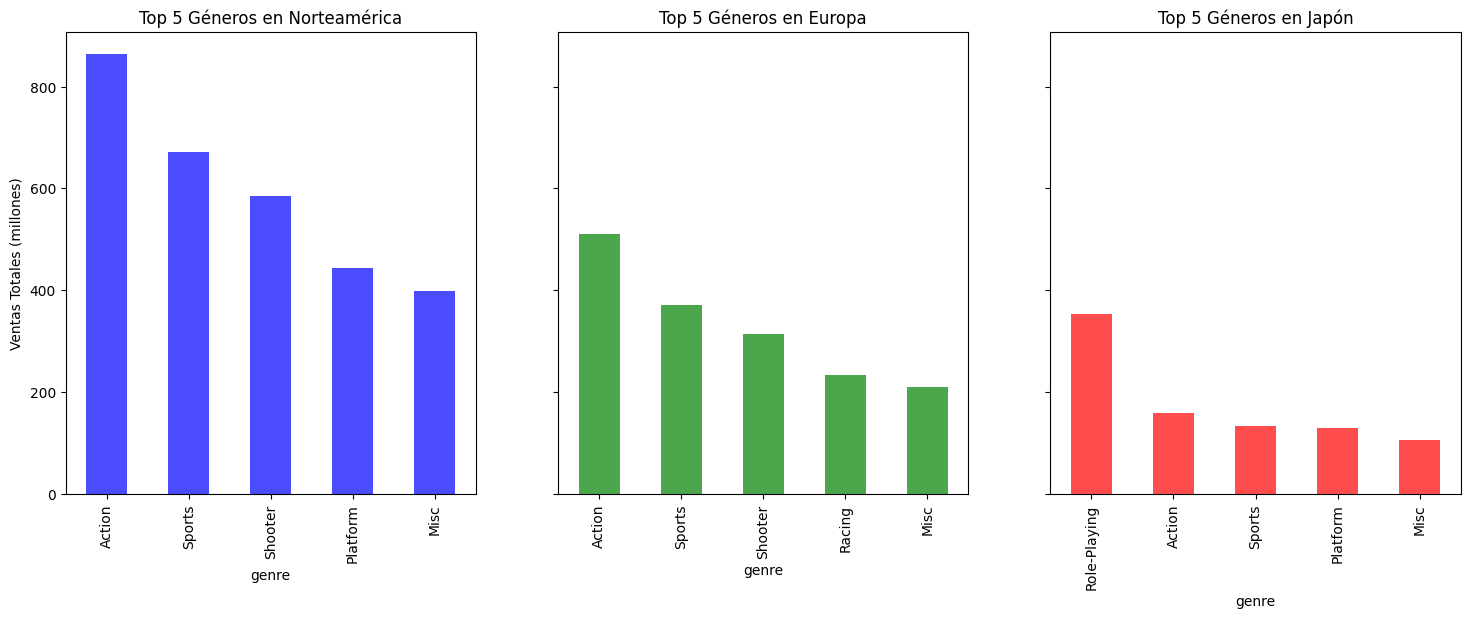

In [24]:
# Calculamos las ventas por género en cada región
genre_sales_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Graficamos los géneros más populares en cada región
fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

genre_sales_na.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
axes[0].set_title("Top 5 Géneros en Norteamérica")
axes[0].set_ylabel("Ventas Totales (millones)")

genre_sales_eu.plot(kind='bar', ax=axes[1], color='g', alpha=0.7)
axes[1].set_title("Top 5 Géneros en Europa")

genre_sales_jp.plot(kind='bar', ax=axes[2], color='r', alpha=0.7)
axes[2].set_title("Top 5 Géneros en Japón")

plt.show()


En Norteamérica y Europa, los géneros como Shooter, Action y Sports suelen ser los más vendidos.
En Japón, los géneros como Role-Playing tienden a ser más populares debido a la fuerte presencia de juegos de Nintendo

La diferencia en géneros refleja diferencias culturales y en hábitos de consumo.

Clasificación ESRB por región

<Figure size 1200x600 with 0 Axes>

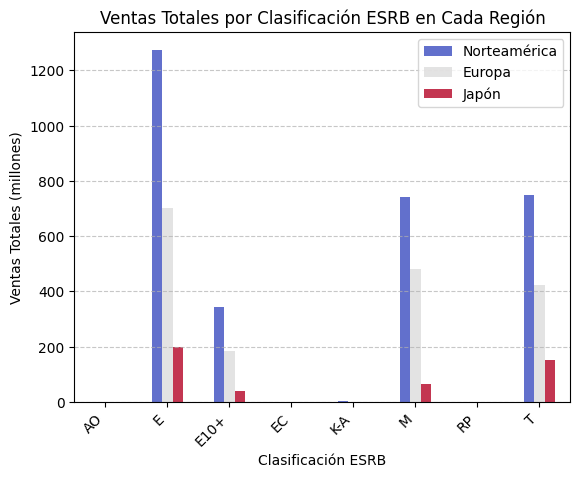

In [25]:

# Agrupamos las ventas por clasificación ESRB en cada región
esrb_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Graficamos la distribución de ventas según ESRB en cada región
plt.figure(figsize=(12,6))
esrb_sales.plot(kind='bar', colormap='coolwarm', alpha=0.8)
plt.title("Ventas Totales por Clasificación ESRB en Cada Región")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45, ha='right')
plt.legend(["Norteamérica", "Europa", "Japón"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En Norteamérica y Europa, los juegos con clasificación M (Mature) y T (Teen) suelen vender bien debido al predominio de juegos Shooter y Action

En Japón, es posible que clasificaciones como E (Everyone) o E10+ tengan más ventas, ya que los juegos de Nintendo y RPGs suelen ser familiares

La clasificación ESRB tiene un impacto variable por región, pero generalmente los juegos más vendidos están en categorías Teen (T) y Mature (M)

##Pruebas de hipótesis

Para determinar si las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC debemos plantear una prueba de hipotesis comparando el promedio de user_score entre las consolas

H0: La calificación promedio de los usuarios para Xbox One y PC es la misma

H1: La calificación promedio de los usuarios para Xbox One y PC es diferente

Primero usamos la prueba de igualdad de varianzas con Levene pra determinar si las varianzas son iguales o no

Usamos una prueba t de Student para comparar las medias de dos grupos independientes

Es una hipótesis bilateral, ya que no estamos asumiendo en qué dirección podría estar la diferencia (es decir, no asumimos que una plataforma tenga necesariamente mejores calificaciones que la otra)

In [26]:
# Convertimos 'user_score' a numérico, reemplazando errores como 'tbd' con NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Filtramos los datos de Xbox One y PC, eliminando valores NaN
xone_scores = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

# Prueba de igualdad de varianzas con Levene
stat_levene, p_levene = levene(xone_scores, pc_scores)

print(f"Estadístico de Levene: {stat_levene:.4f}")
print(f"Valor p de Levene: {p_levene:.4f}")

# Decisión basada en la prueba de Levene
if p_levene > 0.05:
    print("No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.")
    equal_var_assumption = True  # Si p > 0.05, asumimos varianzas iguales
else:
    print("Rechazamos la hipótesis nula de Levene: las varianzas son diferentes.")
    equal_var_assumption = False  # Si p <= 0.05, NO asumimos varianzas iguales

# Prueba t de Student con la decisión de Levene. Como las varianzas son iguales, la prueba t se ejecuta con equal_var=True, lo que hace que la distribución de la prueba sea más precisa
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=equal_var_assumption)

print(f"\nEstadístico de prueba (t): {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluamos la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.")


Estadístico de Levene: 1.1706
Valor p de Levene: 0.2796
No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.

Estadístico de prueba (t): -4.3829
Valor p: 0.0000
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


Para determinar si las calificaciones promedio de los usuarios son diferentes entre los géneros Acción y Deportes, debemos plantear una prueba de hipótesis comparando el promedio de user_score entre los generos

H0: La calificación promedio de los usuarios para los géneros Acción y Deportes es la misma

H1: La calificación promedio de los usuarios para los géneros Acción y Deportes es diferente

Usamos una prueba t de Student para comparar las medias de dos grupos independientes.
Es una hipótesis bilateral, ya que no estamos asumiendo en qué dirección podría estar la diferencia (no asumimos que un género tenga necesariamente mejores calificaciones que el otro)

In [27]:
# Filtramos los datos de los géneros Acción y Deportes, eliminando valores NaN
action_scores = games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score']
sports_scores = games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score']

# Prueba de igualdad de varianzas con Levene
stat_levene, p_levene = levene(action_scores, sports_scores)

print(f"Estadístico de Levene: {stat_levene:.4f}")
print(f"Valor p de Levene: {p_levene:.4f}")

# Decisión basada en la prueba de Levene
if p_levene > 0.05:
    print("No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.")
    equal_var_assumption = True  # Si p > 0.05, asumimos varianzas iguales
else:
    print("Rechazamos la hipótesis nula de Levene: las varianzas son diferentes.")
    equal_var_assumption = False  # Si p <= 0.05, NO asumimos varianzas iguales

# Prueba t de Student con la decisión de Levene
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=equal_var_assumption)

print(f"\nEstadístico de prueba (t): {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluamos la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.")


Estadístico de Levene: 15.4298
Valor p de Levene: 0.0001
Rechazamos la hipótesis nula de Levene: las varianzas son diferentes.

Estadístico de prueba (t): 1.7894
Valor p: 0.0737
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.


Para la comparación entre Xbox One y PC, encontramos que las calificaciones promedio de los usuarios son significativamente diferentes, lo que indica que los jugadores valoran los juegos de estas plataformas de manera distinta

Por otro lado, para la comparación entre los géneros Acción y Deportes, no encontramos evidencia suficiente para afirmar que las calificaciones promedio sean diferentes. Esto sugiere que, en general, los jugadores califican de manera similar (con los mismos criterios) los juegos de ambos géneros

##Pruebas de hipotesis **sin valores atipicos**

In [28]:
# Creamos una copia del DataFrame para trabajar sin afectar el original
games_no_outliers = games.copy()

# Convertimos 'user_score' a numérico
games_no_outliers['user_score'] = pd.to_numeric(games_no_outliers['user_score'], errors='coerce')

# Eliminamos valores NaN para trabajar solo con datos existentes
games_no_outliers = games_no_outliers.dropna(subset=['user_score'])

# Calculamos los cuartiles y el rango intercuartil (IQR) en 'user_score'
Q1 = games_no_outliers['user_score'].quantile(0.25)
Q3 = games_no_outliers['user_score'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores dentro del rango permitido
games_no_outliers = games_no_outliers[
    (games_no_outliers['user_score'] >= lower_bound) &
    (games_no_outliers['user_score'] <= upper_bound)
]

# Mostramos el número de registros eliminados
print(f"Registros antes de filtrar: {len(games)}")
print(f"Registros después de filtrar: {len(games_no_outliers)}")
print(f"Valores atípicos eliminados: {len(games) - len(games_no_outliers)}")


Registros antes de filtrar: 16444
Registros después de filtrar: 7164
Valores atípicos eliminados: 9280


Para determinar si las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC debemos plantear una prueba de hipotesis comparando el promedio de user_score entre las consolas

H0: La calificación promedio de los usuarios para Xbox One y PC es la misma

H1: La calificación promedio de los usuarios para Xbox One y PC es diferente

Primero usamos la prueba de igualdad de varianzas con Levene pra determinar si las varianzas son iguales o no

Usamos una prueba t de Student para comparar las medias de dos grupos independientes

Es una hipótesis bilateral, ya que no estamos asumiendo en qué dirección podría estar la diferencia (es decir, no asumimos que una plataforma tenga necesariamente mejores calificaciones que la otra)

In [29]:
from scipy.stats import levene, ttest_ind

# Filtramos los datos de Xbox One y PC desde el dataset sin valores atípicos
xone_scores_filtered = games_no_outliers[(games_no_outliers['platform'] == 'XOne') & (games_no_outliers['user_score'].notna())]['user_score']
pc_scores_filtered = games_no_outliers[(games_no_outliers['platform'] == 'PC') & (games_no_outliers['user_score'].notna())]['user_score']

# Prueba de igualdad de varianzas con Levene
stat_levene, p_levene = levene(xone_scores_filtered, pc_scores_filtered)

print(f"Estadístico de Levene: {stat_levene:.4f}")
print(f"Valor p de Levene: {p_levene:.4f}")

# Decisión basada en la prueba de Levene
if p_levene > 0.05:
    print("No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.")
    equal_var_assumption = True  # Si p > 0.05, asumimos varianzas iguales
else:
    print("Rechazamos la hipótesis nula de Levene: las varianzas son diferentes.")
    equal_var_assumption = False  # Si p <= 0.05, NO asumimos varianzas iguales

# Prueba t de Student con la decisión de Levene
t_stat, p_value = ttest_ind(xone_scores_filtered, pc_scores_filtered, equal_var=equal_var_assumption)

print(f"\nEstadístico de prueba (t): {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluamos la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.")


Estadístico de Levene: 0.9277
Valor p de Levene: 0.3357
No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.

Estadístico de prueba (t): -5.4302
Valor p: 0.0000
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


Para determinar si las calificaciones promedio de los usuarios son diferentes entre los géneros Acción y Deportes, debemos plantear una prueba de hipótesis comparando el promedio de user_score entre los generos

H0: La calificación promedio de los usuarios para los géneros Acción y Deportes es la misma

H1: La calificación promedio de los usuarios para los géneros Acción y Deportes es diferente

Usamos una prueba t de Student para comparar las medias de dos grupos independientes. Es una hipótesis bilateral, ya que no estamos asumiendo en qué dirección podría estar la diferencia (no asumimos que un género tenga necesariamente mejores calificaciones que el otro)

In [30]:
# Filtramos los datos de los géneros Acción y Deportes desde el dataset sin valores atípicos
action_scores_filtered = games_no_outliers[(games_no_outliers['genre'] == 'Action') & (games_no_outliers['user_score'].notna())]['user_score']
sports_scores_filtered = games_no_outliers[(games_no_outliers['genre'] == 'Sports') & (games_no_outliers['user_score'].notna())]['user_score']

# Prueba de igualdad de varianzas con Levene
stat_levene, p_levene = levene(action_scores_filtered, sports_scores_filtered)

print(f"Estadístico de Levene: {stat_levene:.4f}")
print(f"Valor p de Levene: {p_levene:.4f}")

# Decisión basada en la prueba de Levene
if p_levene > 0.05:
    print("No podemos rechazar la hipótesis nula de Levene: las varianzas son iguales.")
    equal_var_assumption = True  # Si p > 0.05, asumimos varianzas iguales
else:
    print("Rechazamos la hipótesis nula de Levene: las varianzas son diferentes.")
    equal_var_assumption = False  # Si p <= 0.05, NO asumimos varianzas iguales

# Prueba t de Student con la decisión de Levene
t_stat, p_value = ttest_ind(action_scores_filtered, sports_scores_filtered, equal_var=equal_var_assumption)

print(f"\nEstadístico de prueba (t): {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluamos la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.")

Estadístico de Levene: 9.1342
Valor p de Levene: 0.0025
Rechazamos la hipótesis nula de Levene: las varianzas son diferentes.

Estadístico de prueba (t): 0.5946
Valor p: 0.5522
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.


Teniendo en cuenta la base sin valores atipicos, evidenciamos que no hubo cambio significativo en el resultados de las hipotesis

###Conclusión general

En este análisis, exploramos los datos de ventas de videojuegos para entender qué factores influyen en su éxito

- Plataformas y géneros: Las consolas con más ventas en juegos suelen ser las más nuevas, pero algunas como PC se han mantenido en el tiempo. En cuanto a géneros, Action domina en cantidad de juegos y ventas, pero otros como Sports y Shooter generan más ingresos por juego

- Impacto de las reseñas: Los puntajes de los críticos tienen cierta relación con las ventas, pero la opinión de los usuarios no parece influir tanto

- Tendencias en regiones: Las preferencias cambian según la región. En Japón, los juegos de rol tienen más peso, mientras que en Norteamérica y Europa dominan los deportes y los shooters

- Hipótesis: Comprobamos que las calificaciones de los usuarios varían entre plataformas, pero no hay diferencias claras entre géneros

En resumen, los juegos más vendidos suelen estar en varias plataformas y pertenecer a géneros populares. Las consolas con más ventas son aquellas que se actualizan con el tiempo. Para futuras estrategias, es clave considerar la plataforma, la región y la presencia en múltiples consolas para maximizar el éxito



